In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("tem10.csv", encoding = "utf-8")
df.head()

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1


In [15]:
train_year = (df["연"] <= 2015)
train_year.head()

0    True
1    True
2    True
3    True
4    True
Name: 연, dtype: bool

In [16]:
test_year = (df["연"] >= 2016)
test_year.head()

0    False
1    False
2    False
3    False
4    False
Name: 연, dtype: bool

In [17]:
interval = 6

In [18]:
print(df[train_year])

         연   월   일    기온  품질  균질
0     2006   1   1   3.6   8   1
1     2006   1   2   4.0   8   1
2     2006   1   3   3.7   8   1
3     2006   1   4   4.0   8   1
4     2006   1   5   3.6   8   1
5     2006   1   6   2.1   8   1
6     2006   1   7   2.8   8   1
7     2006   1   8   4.2   8   1
8     2006   1   9   3.7   8   1
9     2006   1  10   4.3   8   1
10    2006   1  11   6.1   8   1
11    2006   1  12   6.1   8   1
12    2006   1  13   4.0   8   1
13    2006   1  14   6.6   8   1
14    2006   1  15  10.7   8   1
15    2006   1  16   9.0   8   1
16    2006   1  17   8.0   8   1
17    2006   1  18   5.6   8   1
18    2006   1  19   4.2   8   1
19    2006   1  20   4.0   8   1
20    2006   1  21   1.3   8   1
21    2006   1  22   3.1   8   1
22    2006   1  23   2.5   8   1
23    2006   1  24   4.4   8   1
24    2006   1  25   5.5   8   1
25    2006   1  26   6.0   8   1
26    2006   1  27   6.8   8   1
27    2006   1  28   5.5   8   1
28    2006   1  29   6.0   8   1
29    2006

In [19]:
def make_data(data):
    x = []
    y = []
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval:continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x,y)

In [20]:
train_x, train_y = make_data(df[train_year])
test_x,  test_y  = make_data(df[test_year])

In [11]:
lr = LinearRegression(normalize = True)
lr.fit(train_x,train_y)
pre_y = lr.predict(test_x)

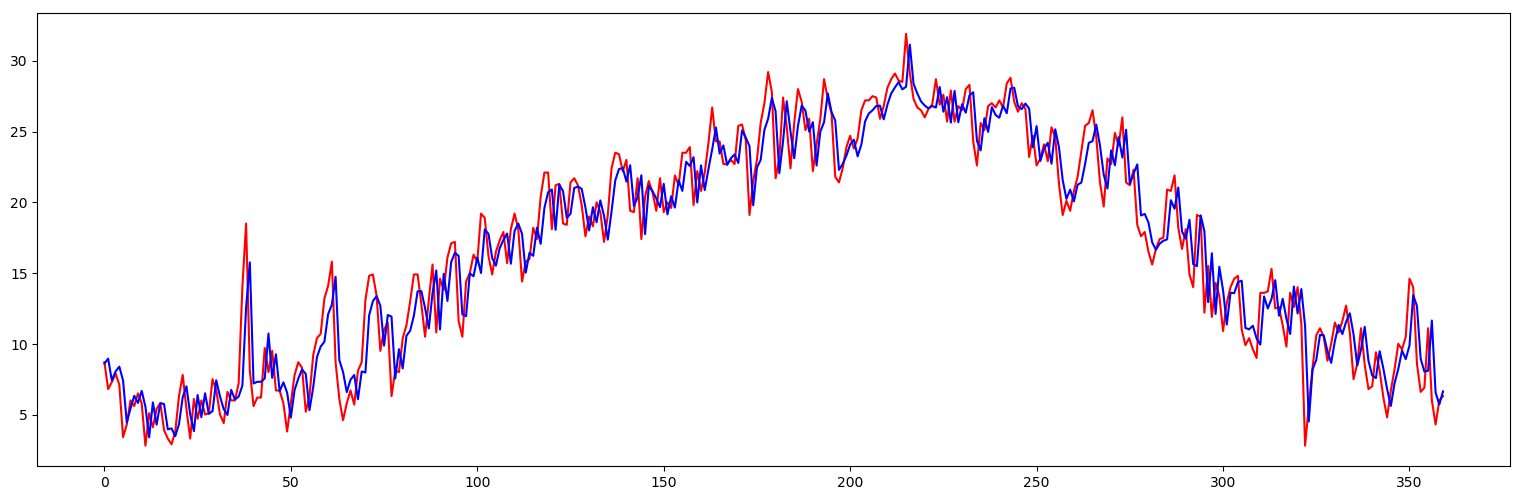

In [12]:
plt.figure(figsize = (19,6), dpi = 100)
plt.plot(test_y, c = 'r')
plt.plot(pre_y, c = 'b')